In [1]:
import seaborn as sns

In [2]:
import pandas as pd

train_data = pd.read_csv('cleaned_train.csv')
test_data = pd.read_csv('cleaned_test.csv')

In [3]:
y = train_data['Transported'].astype(int)
x = train_data.drop(['Transported'], axis=1)
test_data['Num'].fillna(test_data['Num'].mode()[0],inplace=True)
x_test = test_data

In [4]:
x_test.shape

(4277, 19)

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

ValueError: could not convert string to float: 'B'

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.1,random_state=42)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=[27]),
    layers.Dense(units=54, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=27, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.compile(optimizer='Adam', loss="binary_crossentropy", metrics=["binary_accuracy"])

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.001, restore_best_weights=True)

In [ ]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_val,y_val),
    epochs=200,
    batch_size=256,
    callbacks=early_stopping
)

Epoch 1/200
30/30 [==============================] - 3s 17ms/step - loss: 0.6533 - binary_accuracy: 0.6487 - val_loss: 0.6628 - val_binary_accuracy: 0.6682
Epoch 2/200
30/30 [==============================] - 0s 5ms/step - loss: 0.4888 - binary_accuracy: 0.7535 - val_loss: 0.6308 - val_binary_accuracy: 0.6553
Epoch 3/200
30/30 [==============================] - 0s 5ms/step - loss: 0.4454 - binary_accuracy: 0.7815 - val_loss: 0.5976 - val_binary_accuracy: 0.6894
Epoch 4/200
30/30 [==============================] - 0s 6ms/step - loss: 0.4218 - binary_accuracy: 0.7960 - val_loss: 0.5684 - val_binary_accuracy: 0.7047
Epoch 5/200
30/30 [==============================] - 0s 8ms/step - loss: 0.4108 - binary_accuracy: 0.8031 - val_loss: 0.5387 - val_binary_accuracy: 0.7341
Epoch 6/200
30/30 [==============================] - 0s 6ms/step - loss: 0.4018 - binary_accuracy: 0.8098 - val_loss: 0.5188 - val_binary_accuracy: 0.7365
Epoch 7/200
30/30 [==============================] - 0s 5ms/step - lo

<AxesSubplot: title={'center': 'Accuracy'}>

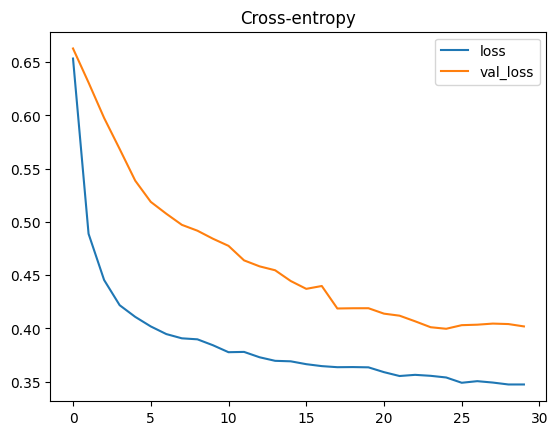

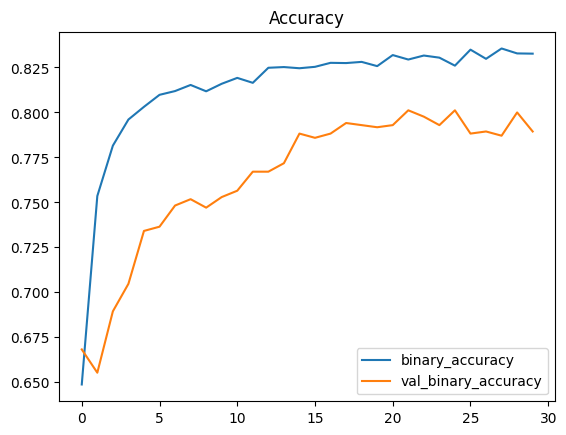

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

In [ ]:
result = model.predict(x_test)

134/134 [==============================] - 1s 2ms/step


<AxesSubplot: ylabel='Count'>

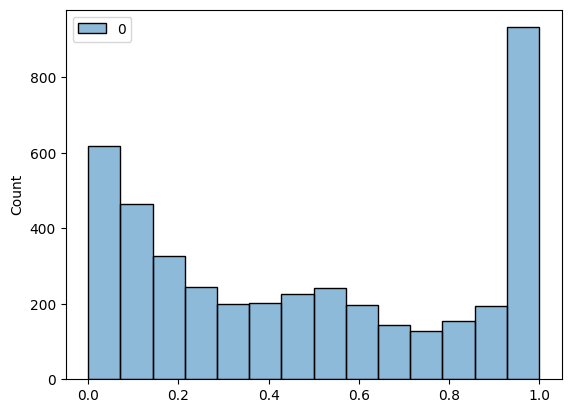

In [ ]:
sns.histplot(result)

In [ ]:
df = pd.DataFrame(result, index=test_data.index)
df.isna().sum()

0    0
dtype: int64

In [ ]:
new_result = []
for value in result:
    if value>=0.5:
        new_result.append('True')
    else:
        new_result.append('False')

In [ ]:
test_data = pd.read_csv('test.csv')
df = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Transported': new_result})
df.to_csv('submission.csv',index=False)